## Object detection
Object detection is a computer vision task that involves identifying and locating objects in an image or video. The goal is to not only recognize the type of objects present but also to provide the precise location of each object by drawing bounding boxes around them

#### Pre-trained Models
Object detection models are often pre-trained on large datasets containing annotated images. Popular architectures include Faster R-CNN, YOLO (You Only Look Once), SSD (Single Shot Multibox Detector), and RetinaNet.

In [41]:
from ultralytics import YOLO
import warnings
warnings.filterwarnings("ignore")

In [42]:
model=YOLO("yolov8m.pt")      #

In [43]:
result=model.predict(r"C:\Users\katku\Downloads\group1.jpg",conf=0.25)


image 1/1 C:\Users\katku\Downloads\group1.jpg: 480x640 7 persons, 1 potted plant, 1 remote, 1884.5ms
Speed: 9.0ms preprocess, 1884.5ms inference, 7.4ms postprocess per image at shape (1, 3, 480, 640)


In [44]:
result=result[0]
print(len(result.boxes))

9


In [45]:
for box in result.boxes:
    label=result.names[box.cls[0].item()]
    cords=[round(x) for x in box.xyxy[0].tolist()]
    prob=box.conf[0].item()
    print("object type:",label)
    print("cooridinates:",cords)
    print("porbability:",prob)
    print("---")

object type: person
cooridinates: [81, 108, 199, 406]
porbability: 0.9108911752700806
---
object type: person
cooridinates: [12, 144, 91, 454]
porbability: 0.9103448987007141
---
object type: person
cooridinates: [457, 124, 571, 481]
porbability: 0.9097706079483032
---
object type: person
cooridinates: [558, 134, 660, 513]
porbability: 0.9018014669418335
---
object type: person
cooridinates: [287, 113, 369, 335]
porbability: 0.893689751625061
---
object type: person
cooridinates: [375, 92, 445, 356]
porbability: 0.887053370475769
---
object type: person
cooridinates: [184, 129, 271, 433]
porbability: 0.8864508271217346
---
object type: potted plant
cooridinates: [178, 57, 299, 311]
porbability: 0.8615912199020386
---
object type: remote
cooridinates: [128, 199, 148, 210]
porbability: 0.326001912355423
---


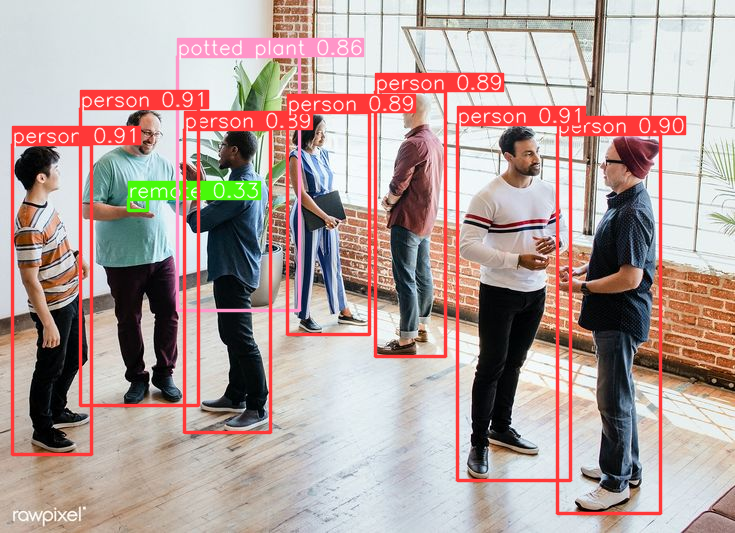

In [46]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])

## Image segmentation
Image segmentation is a computer vision task that involves dividing an image into multiple segments or regions based on certain characteristics, such as color, intensity, or texture.

Goal:to simplify the representation of an image and make it easier to analyze

In [63]:
import torch
from torchvision import transforms
from PIL import Image
from torchvision.models.segmentation import deeplabv3_resnet101
from IPython.display import display

In [64]:
# Load the DeepLabV3 model
model = deeplabv3_resnet101(pretrained=True)

In [65]:
# Set the model to evaluation mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [66]:
# Transform the input image
transform = transforms.Compose([transforms.ToTensor(),])

In [67]:
# Load and transform the image
image_path = r"C:\Users\katku\Downloads\group1.jpg"
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)

In [68]:
# Perform inference
with torch.no_grad():
    output = model(input_tensor)['out'][0]

In [69]:
# Convert the output to a binary mask
mask = output.argmax(0).cpu().numpy()

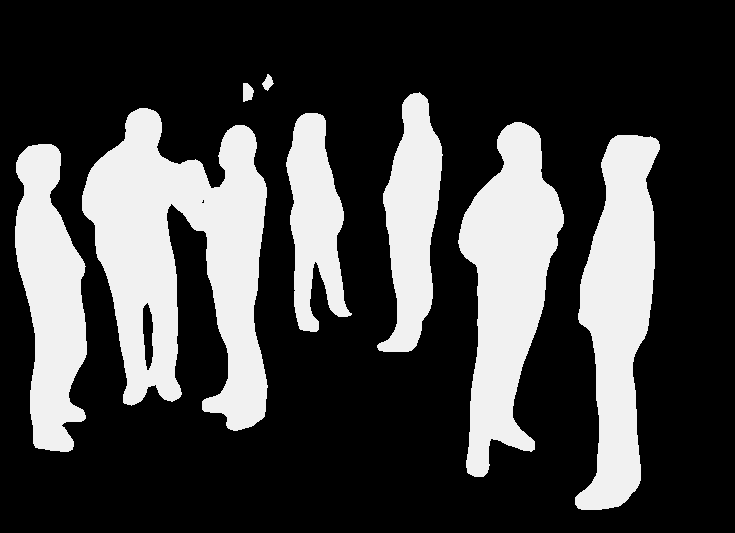

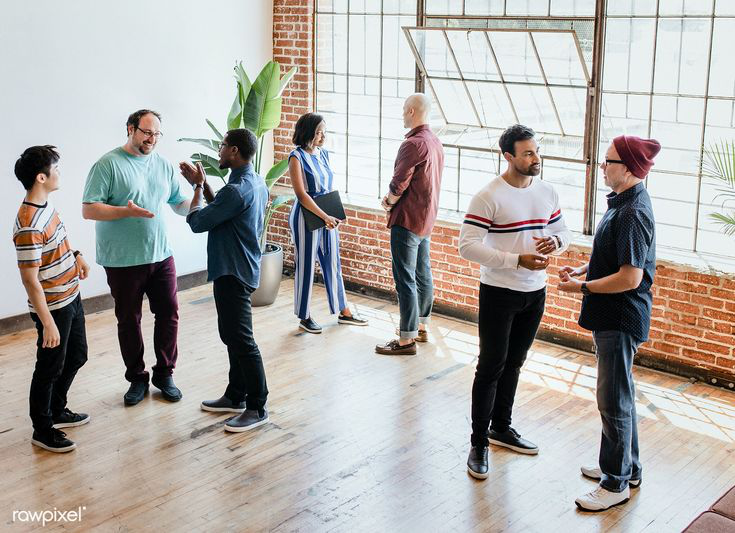

In [71]:
## Display the binary mask
binary_mask = (mask * 255).astype('uint8')
mask_image = Image.fromarray(binary_mask)
display(mask_image)

## Display the original image
display(image)